#### LIS 590 Data Visualization Spring 2017
#### Group Project by
#### Group *Summer*: Bei Xiao, La Luo, Liqun Zeng, and Vaishnavi Padala

# Component 2
----
## Data Visualization on Grant data

In order to un this notebook, you need to install:
- cartopy
- ipywidgets
- plotly
- colorlover
- bokeh
- colorlover

#### Outline
1. Read in the Grant data
2. Read in the GDP data and merge it with the Grant data
3. Spatial Visualization
4. Exploring Program Type and Grant Award Total
5. Exploring the relation between Grant Award Total and local GDP
----
## Read in the Grant data

In [27]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
from collections import Counter
from mpl_toolkits.basemap import Basemap

In [28]:
data = pd.read_csv('./DiscGrants96to13.csv', encoding='latin')

In [3]:
data.head()

,LogNumber,Institution,Program,ProgramType,ProjectTitle,ProjectType,AwardDate,InstAddr1,InstAddr2,InstAddr3,...,Longitude,FIPSState,FIPSCounty,CensusTract,CensusBlock,FIPSMCDCode,FIPSPlaceCode,CBSACode,MetroDivisionCode,Description
0,IA-00-00-0001-00,Museum of the Aleutians,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 648,NaN,NaN,...,-166.536862,2.0,16.0,200.0,2014.0,1615.0,80770.0,NaN,NaN,NaN
1,IA-00-00-0002-00,"Depot Museum, Inc.",Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 681420,NaN,NaN,...,-85.694757,1.0,49.0,961000.0,2013.0,91206.0,27616.0,NaN,NaN,NaN
2,IA-00-00-0003-00,National Voting Rights Museum and Institute,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,6 Highway 80 East,NaN,NaN,...,-87.017024,1.0,47.0,957200.0,1005.0,92883.0,NaN,42820.0,NaN,NaN
3,IA-00-00-0004-00,Bob Jones Museum,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 613,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IA-00-00-0005-00,Coronado Museum of History and Art,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,1100 Orange Avenue,NaN,NaN,...,-117.170703,6.0,73.0,10900.0,1021.0,92780.0,16378.0,41740.0,NaN,NaN


In [12]:
data.keys()

Index(['LogNumber', 'Institution', 'Program', 'ProgramType', 'ProjectTitle',
       'ProjectType', 'AwardDate', 'InstAddr1', 'InstAddr2', 'InstAddr3',
       'InstCity', 'InstState', 'InstZip', 'AwardOrig', 'AwardTotal',
       'AppMatchAmount', 'ReqAwardAmount', 'ReqMatchAmount', 'Prefix',
       'FirstName', 'LastName', 'OrgType', 'FiscalYear', 'AwardPeriodFr',
       'AwardPeriodTo', 'OrgUnit', 'OUAddr1', 'OUAddr2', 'OUAddr3', 'OUCity',
       'OUState', 'OUZip', 'Latitude', 'Longitude', 'FIPSState', 'FIPSCounty',
       'CensusTract', 'CensusBlock', 'FIPSMCDCode', 'FIPSPlaceCode',
       'CBSACode', 'MetroDivisionCode', 'Description'],
      dtype='object')

In [13]:
data['ProgramType'].unique()

array(['IA', 'IC', 'IG', 'IL', 'IM', 'IS', 'LE', 'LG', 'LI', 'LT', 'MA',
       'MH', 'ML', 'MN', 'RE', 'ST', 'MP'], dtype=object)

In [14]:
data['FiscalYear'].value_counts()

1998.0    988
2001.0    956
1999.0    903
2000.0    894
2004.0    880
2003.0    879
2002.0    876
2005.0    874
1997.0    673
2010.0    661
2009.0    638
2011.0    628
1996.0    623
2012.0    619
2007.0    611
2006.0    580
2008.0    561
2013.0    372
Name: FiscalYear, dtype: int64

In [15]:
data.shape

(13218, 43)

## Read in GDP Data

In [22]:
# GDP by MA data
gdp = pd.read_csv('./GDP_by_MA.csv', encoding='latin')

# switch wide format to long format
gdp.drop('Area', axis = 1, inplace = True)
gdp.set_index('Fips', inplace=True)
gdp = gdp.stack(level=0).reset_index()
gdp.columns = ['CBSACode', 'FiscalYear','GDP']
gdp.CBSACode = gdp.CBSACode.astype(float)
gdp.FiscalYear = gdp.FiscalYear.astype(float)

print(gdp.tail())
print(gdp.shape)

      CBSACode  FiscalYear    GDP
5725   49740.0      2011.0  25661
5726   49740.0      2012.0  23884
5727   49740.0      2013.0  25148
5728   49740.0      2014.0  24149
5729   49740.0      2015.0  24384
(5730, 3)


## Data management
### Read new dataset of US States Abbreviation and merge with existing data

In [17]:
Statescount=data.groupby("InstState").size().reset_index(name='count')
Statescount.columns=["Abbreviation","count"]
Statescount.head()

,Abbreviation,count
0,AK,948
1,AL,95
2,AR,51
3,AS,1
4,AZ,302


In [18]:
states = pd.read_csv('https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv', encoding='latin')
statescount=pd.merge(states, Statescount, on='Abbreviation', how='outer')
statescount=statescount.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
countdict = dict(zip(statescount["State"], statescount["count"]))
vmax=max(countdict.values())
vmin=min(countdict.values())
states_shortname=dict(zip(states["State"],states["Abbreviation"]))

## Spatial Visualization
### Distribution of Grant-Amount by State (By Basemap)

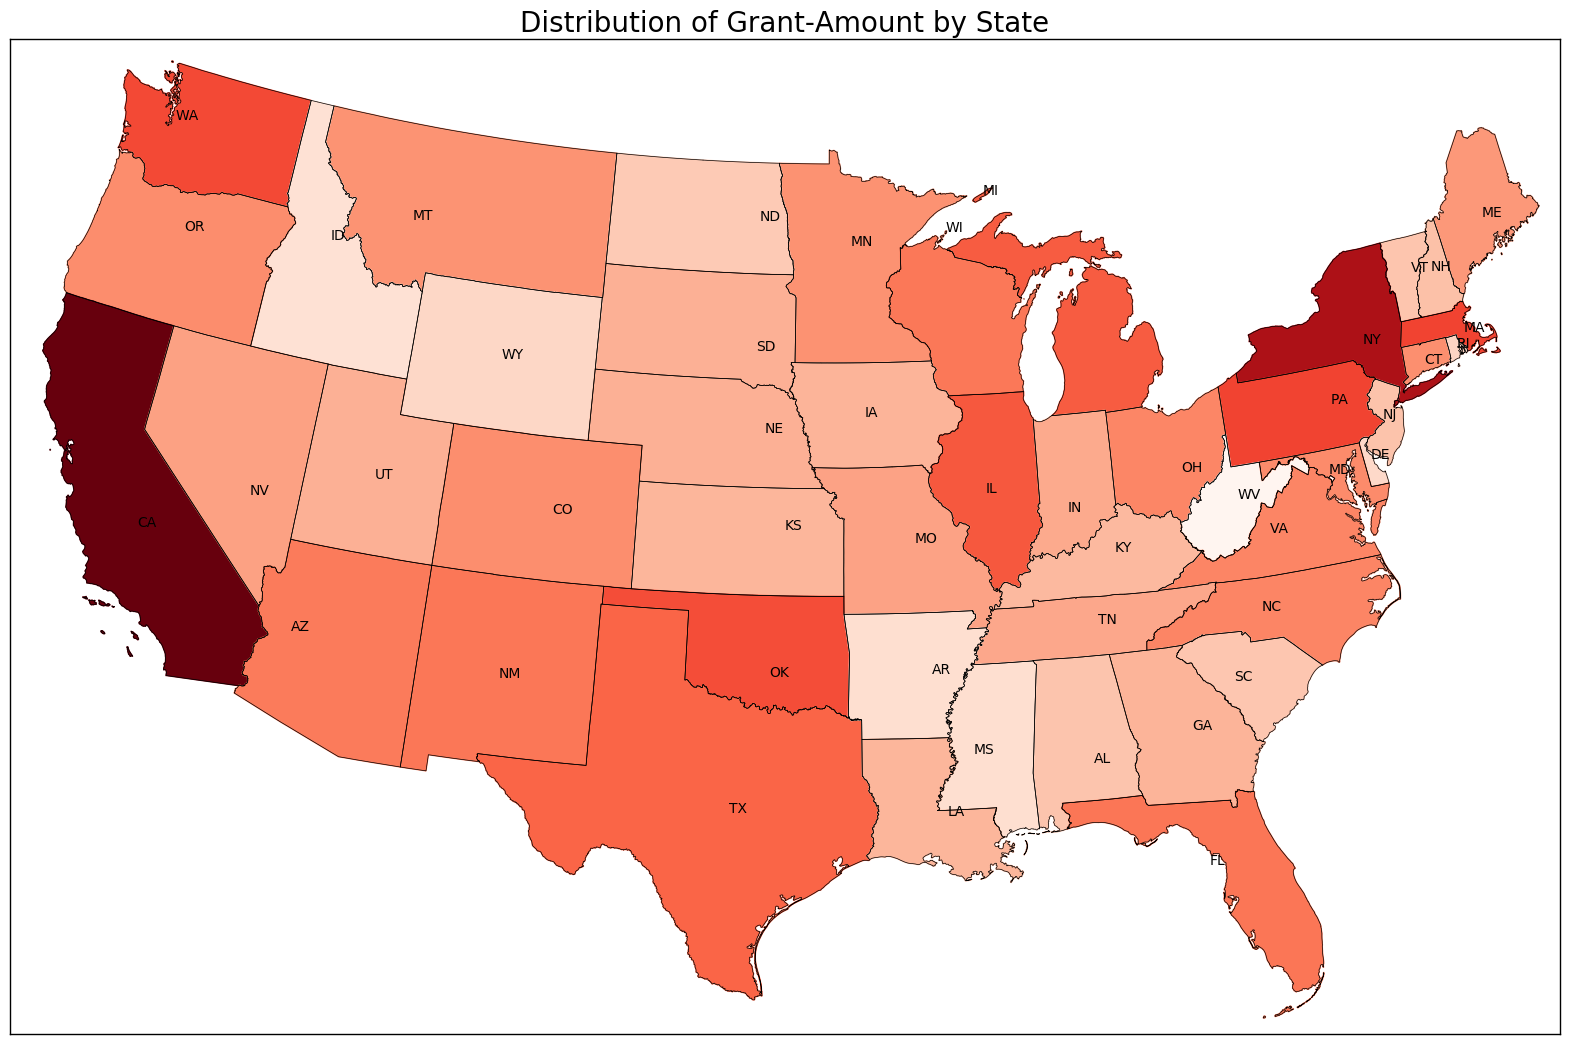

In [19]:
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

# Reference:
### http://stackoverflow.com/questions/39742305/how-to-use-basemap-python-to-plot-us-with-50-states
### http://stackoverflow.com/questions/42463200/draw-state-abbreviations-in-matplotlib-basemap

fig, ax = plt.subplots(figsize = (20,20))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)


# choose a color for each state based on reward amount
colors={}
statenames=[]
cmap = plt.cm.Reds

for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico','Alaska', 'Hawaii']:
        pop = countdict[statename]
        colors[statename] = cmap(np.sqrt((pop-vmin)/(vmax-vmin)))
    statenames.append(statename)


for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico', 'District of Columbia','Alaska', 'Hawaii']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        cax=ax.add_patch(poly)
        
printed_names = []
short_name = []
for shapedict,state in zip(m.states_info, m.states):
    statename = shapedict['NAME']    
    if statename not in ['District of Columbia','Puerto Rico','Alaska', 'Hawaii']:
        short_name = states_shortname[statename]
        if short_name in printed_names: continue
        x, y = np.array(state).mean(axis=0) 
        plt.text(x+.1, y, short_name)
    printed_names += [short_name] 

ax.set_title("Distribution of Grant-Amount by State",fontsize=20)



## Scatterplot of Grants (information about AwardTotal and ReqAwardAmount)

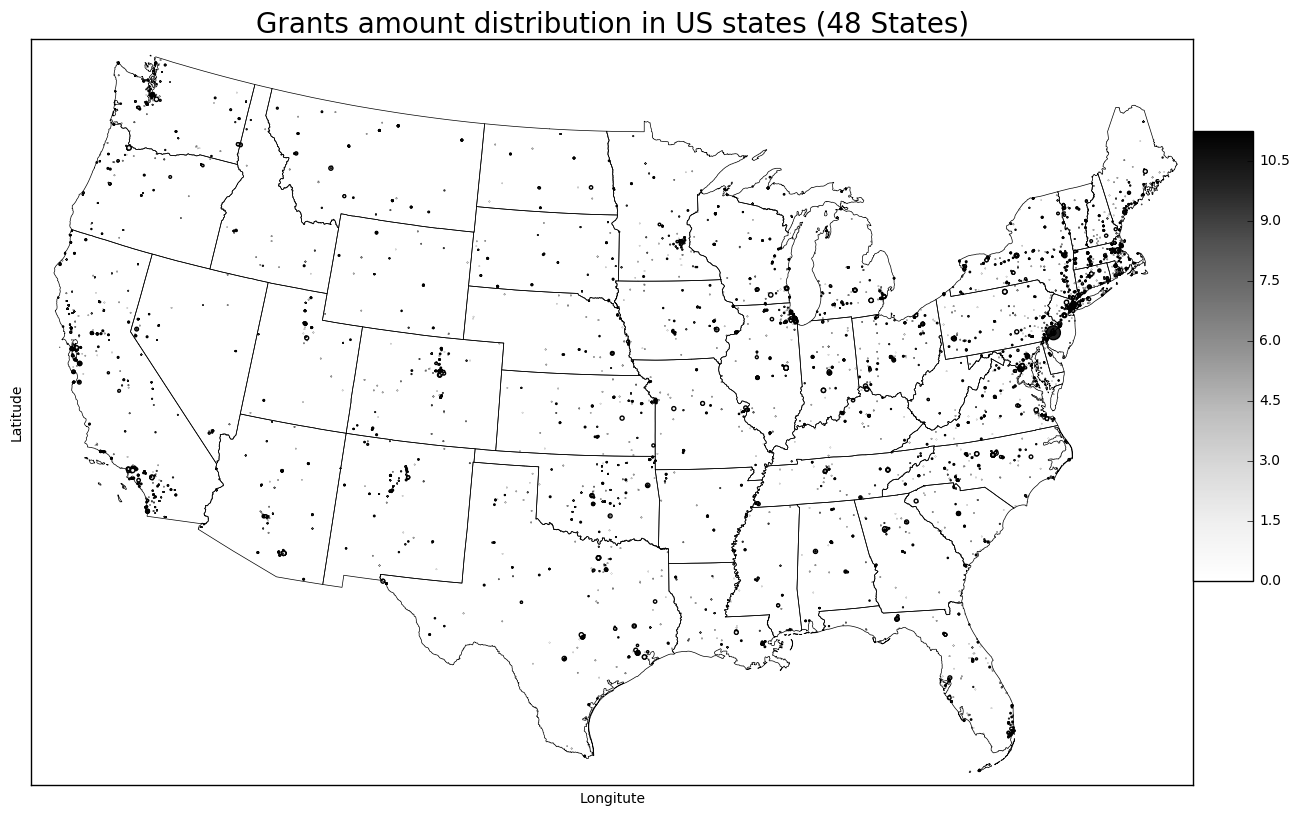

In [20]:
lon=data["Longitude"].tolist()
lat=data["Latitude"].tolist()

fig, ax = plt.subplots(figsize = (15,15))

m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
shape_info=m.readshapefile('st99_d00', name='states', drawbounds=True)
# set a geo coordinate (for example, new york)

x,y = m(lon,lat)

#Adjust the color and size scale of quantitative variables
min_val, max_val = data["AwardTotal"].min(), data["AwardTotal"].max()
data["rewardscale"] = ((data["AwardTotal"]-min_val)/(max_val-min_val))*100
data["new"]=((data["ReqAwardAmount"]-min_val)/(max_val-min_val))*10
cmap = plt.cm.Reds

ms=m.scatter(x, y, c=data["new"],s=(data["rewardscale"]),cmap = plt.cm.Greys)

# Create color bar
cax = fig.add_axes([0.9, 0.4, 0.04, 0.3])
cbar = fig.colorbar(ms, cax=cax)

ax.set_title("Grants amount distribution in US states (48 States)",fontsize=20)
ax.set_xlabel("Longitute")
ax.set_ylabel("Latitude")

## Merge Grant Data (Selected Columns) and GDP Data by CBSA Code

In [23]:
left = data[['CBSACode','FiscalYear',
             'AwardTotal','Longitude','Latitude']].dropna(subset = ['CBSACode','FiscalYear']).set_index(['CBSACode','FiscalYear'])
right = gdp.set_index(['CBSACode','FiscalYear'])

data_merged = left.join(right)
data_merged = data_merged.reset_index()
print(data_merged.keys())

Index(['CBSACode', 'FiscalYear', 'AwardTotal', 'Longitude', 'Latitude', 'GDP'], dtype='object')


## Exploring Program Type and Award Total

### The Distribtuion of Grant-receiving Institutes Around US (Using Cartopy)

#### !!! Need to install *cartopy* to run the following blocks !!!

In [28]:
import cartopy.crs as ccrs
import cartopy

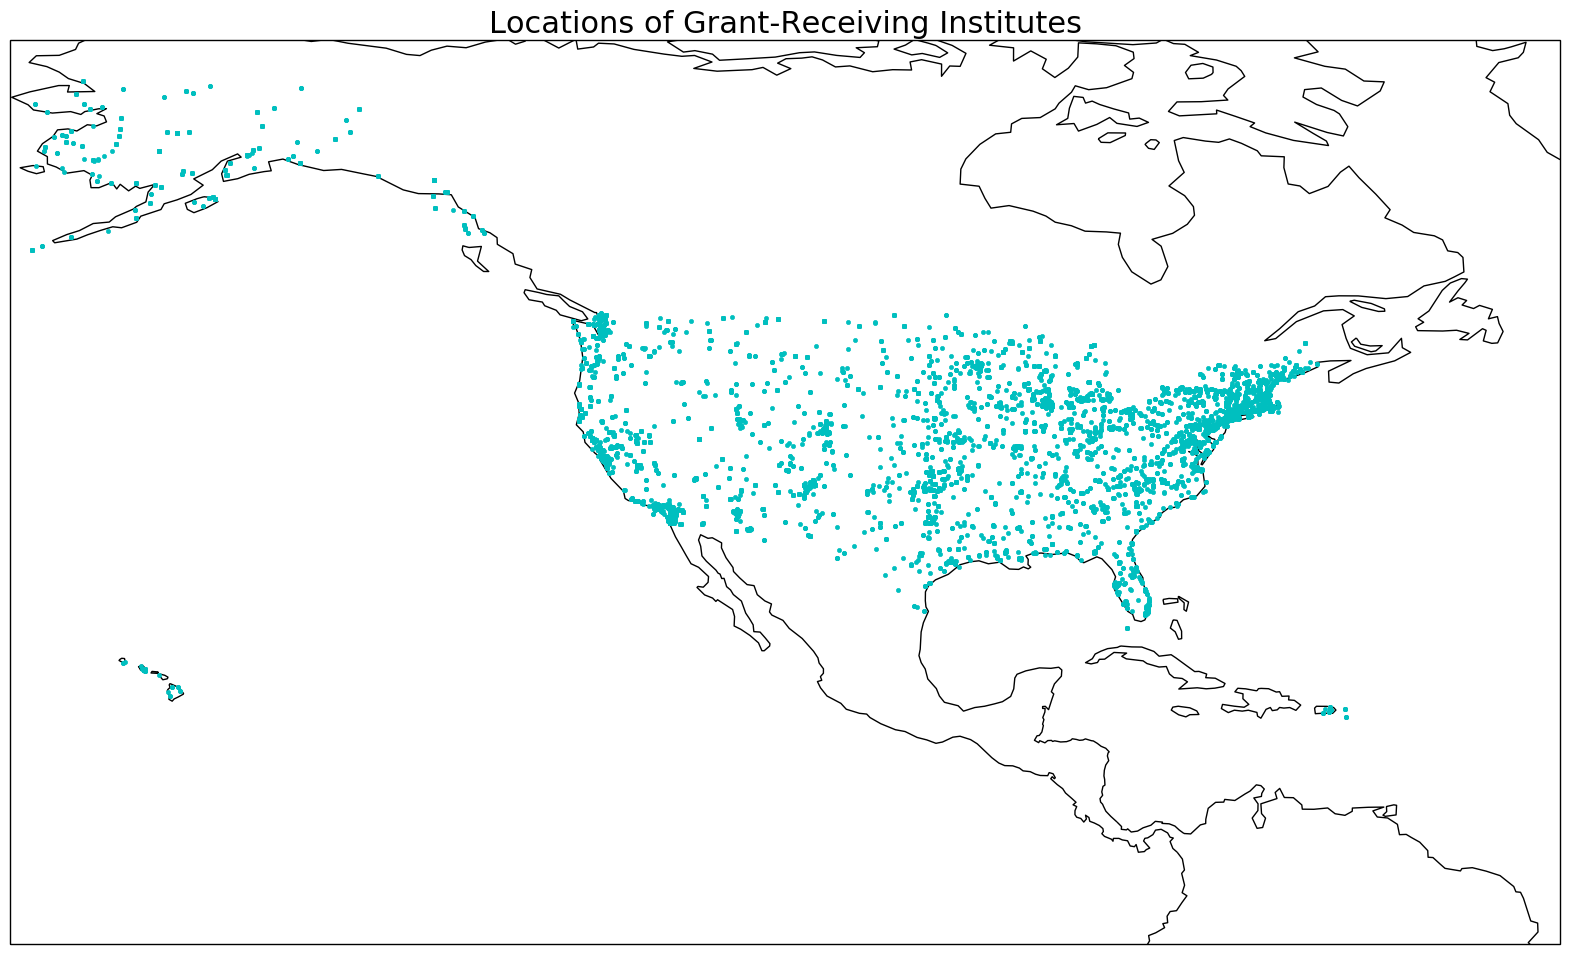

In [29]:
champaign = (40.1164, -88.2434)
fig, ax = plt.subplots(figsize = (20,20))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines()
#ax.stock_img()
ax.set_extent([champaign[1] - 80, champaign[1] + 40, champaign[0] - 40, champaign[0] + 30], ccrs.PlateCarree())
ax.plot(data["Longitude"],data["Latitude"], '.c')
ax.set_title('Locations of Grant-Receiving Institutes', fontsize = 22)
#ax.gridlines()

### The Distributions of Differenty Types of Grants (Using ipywidets)

#### !!! Need to install *ipywidgets* to run the following blocks !!!

In [30]:
plt.rcParams["figure.figsize"] = (15, 15)
def grant_type(column, value):
    good = (data[column] == value)
    data_filtered = data[good]
    champaign = (40.1164, -88.2434)
    fig, ax = plt.subplots(figsize = (20,20))
    ax = plt.axes(projection = ccrs.PlateCarree())
    ax.coastlines()
    ax.set_extent([champaign[1] - 80, champaign[1] + 40, champaign[0] - 40, champaign[0] + 30], ccrs.PlateCarree())
    ax.plot(data_filtered["Longitude"],data_filtered["Latitude"], '.c')
    ax.set_title('Prgrom Type: {0}'.format(value), fontsize = 22)

<function __main__.grant_type>

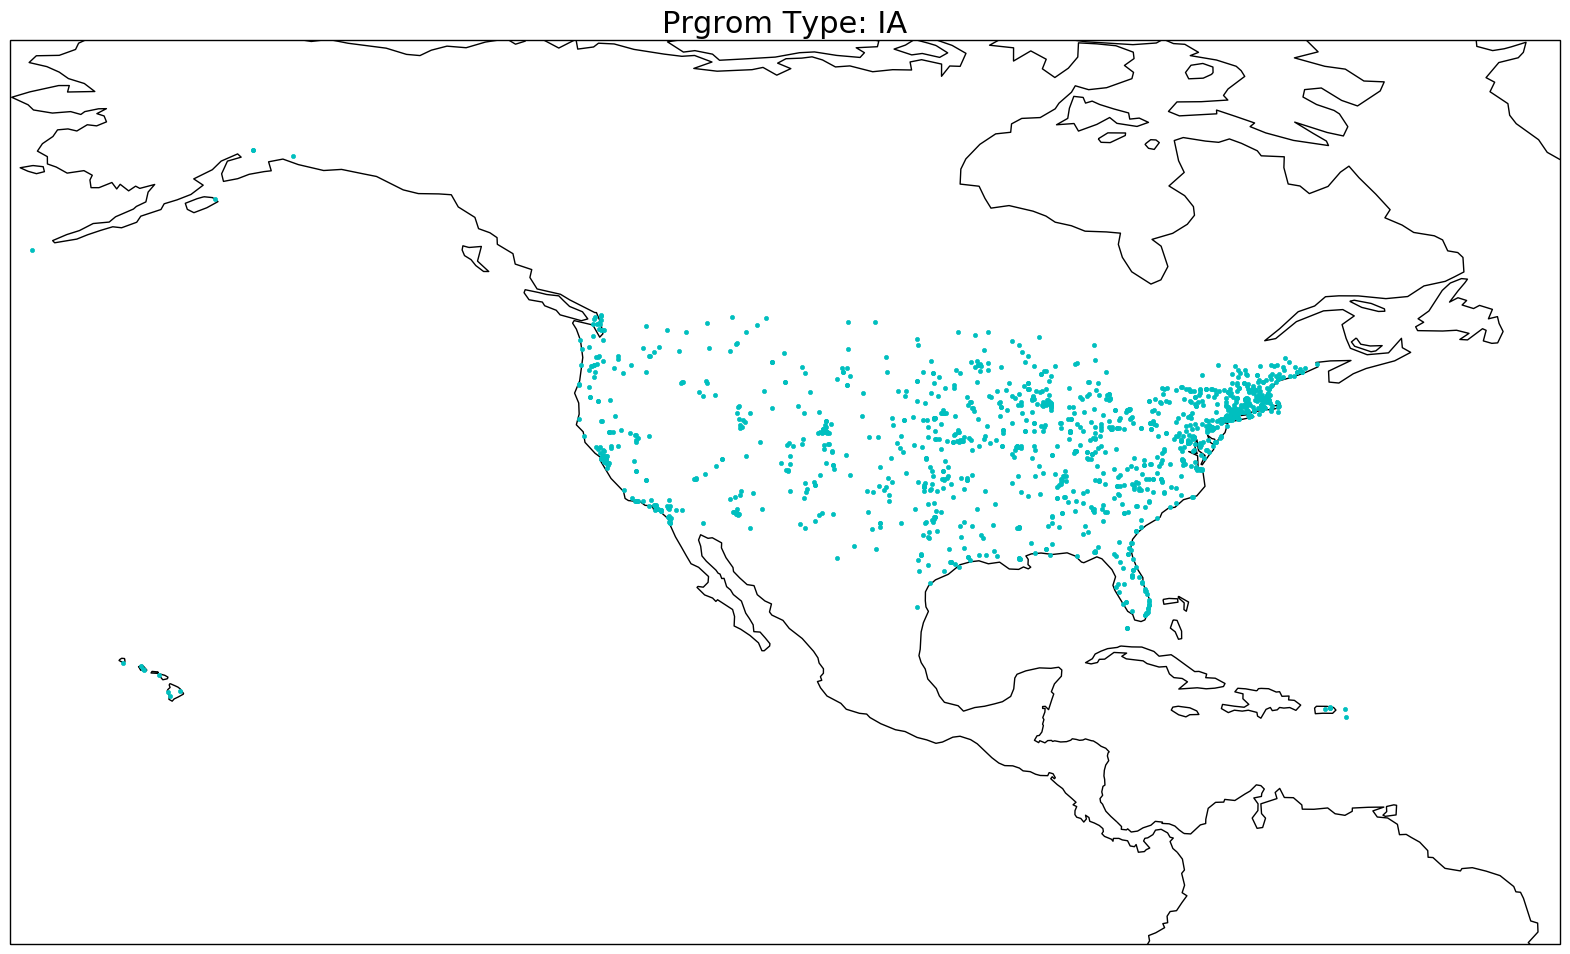

In [31]:
import ipywidgets
ipywidgets.interact(grant_type, column = 'ProgramType',
                   value = data['ProgramType'].unique().tolist())

### Trend in the Change of Grant Composition (Using Plotly)

#### !!! Need to install *plotly*  and *colorlover* to run the following blocks !!!

In [32]:
def data_filter(column,value):
    selected = data[column] == value
    data_filtered = data[selected]
    return data_filtered

In [33]:
import plotly
import plotly.plotly as py
import colorlover as cl
from plotly.graph_objs import *

plotly.tools.set_credentials_file(username='lzeng6', api_key='sET35IN6zBEbv5lZaT9M')

In [34]:
import plotly.graph_objs as go

trace = []

types = data['ProgramType'].unique().tolist()

colors = cl.scales['8']['qual']['Set2']
colors = cl.interp(colors, len(types))

for idx, pg_type in enumerate(types):
    
    dt = data_filter('ProgramType',pg_type)
    x = sorted(dt['FiscalYear'].unique().tolist())
    y = dt['FiscalYear'].value_counts().sort_index().tolist()
    trace.append(go.Scatter(
        x = x,
        y = y,
        name = pg_type,
        mode = 'lines',
        line = dict(width=1,
              color=colors[idx])
    ))

layout = go.Layout(
    showlegend=True,
    title = 'Counts of Grants by Program Type (1996-2013)',
    #updatemenu = list([
    #        dict = (
    #        ),
    #    ]
    #),
    xaxis=dict(
        title = 'Years',
        type = 'linear',
        range = [1996,2013],
        dtick = 1,
    ),
    yaxis=dict(
        title = 'Counts'
    )
)

fig = go.Figure(data = trace, layout = layout)
py.iplot(fig, filename='stream_program_type')

### Locations of Institutes and Grant Award Total (Using Bokeh)

#### !!! Need to install *bokeh* to run the following blocks !!!

In [25]:
from bokeh.io import output_notebook, show, gridplot
from bokeh.plotting import figure
import bokeh.models
from bokeh.models import PrintfTickFormatter

In [26]:
output_notebook()

Loading BokehJS ...

In [37]:
dt = data.copy()[['FiscalYear','AwardTotal','Longitude','Latitude']]
source = bokeh.models.ColumnDataSource(dt)

In [38]:
TOOLS = 'box_select,lasso_select,help,reset,box_zoom'

p1 = figure(tools = TOOLS, 
                title = "Grant Award Total by Fiscal Year",
                width=600, height = 600, 
                x_range = (1995,2014), y_range = (0, 1000000),
                x_axis_label = 'Fiscal Year', y_axis_label = 'Award Total')

p1.yaxis[0].formatter = PrintfTickFormatter(format="%6.0f")
                
p2 = figure(tools = TOOLS, 
                title = "Locations of Institutes",
                width=600, height = 600,
                x_axis_label = 'Longitude', y_axis_label = "Latitude")

p2.xaxis[0].formatter = PrintfTickFormatter(format="%5.2f")
p2.yaxis[0].formatter = PrintfTickFormatter(format="%5.2f")

In [39]:
p1.circle('FiscalYear','AwardTotal', source = source,
                 size = 2,
                 selection_color="firebrick",
                 nonselection_fill_alpha=0.05,
                 nonselection_fill_color="blue")
p2.circle('Longitude','Latitude', source = source,
                 size = 2,
                 selection_color="firebrick",
                 nonselection_fill_alpha=0.05,
                 nonselection_fill_color="blue")

GlyphRenderer(id='d3f6571f-92ad-47a6-bacb-f6b8150aba63', ...)

In [40]:
p = gridplot([[p1, p2]])
show(p)

## Grant Award Total and Local GDP (Using Bokeh, merged by geo information)

In [27]:
dt2 = data_merged.copy()
source = bokeh.models.ColumnDataSource(dt2)

In [42]:
TOOLS = 'box_select,lasso_select,help,reset,box_zoom'

p1 = figure(tools = TOOLS, 
                title = "Grant Award Total by Fiscal Year",
                width=600, height = 600, 
                x_range = (1995,2014), y_range = (0, 1000000),
                x_axis_label = 'Fiscal Year', y_axis_label = 'Award Total')

p1.yaxis[0].formatter = PrintfTickFormatter(format="%6.0f")
                
p2 = figure(tools = TOOLS, 
                title = "GDP by Fiscal Year",
                width=600, height = 600,
                x_axis_label = 'FiscalYear', y_axis_label = "Local GDP")

p2.yaxis[0].formatter = PrintfTickFormatter(format="%6.0f")

In [43]:
p1.circle('FiscalYear','AwardTotal', source = source,
                 size = 2,
                 selection_color="firebrick",
                 nonselection_fill_alpha=0.05,
                 nonselection_fill_color="blue")
p2.circle('FiscalYear','GDP', source = source,
                 size = 2,
                 selection_color="firebrick",
                 nonselection_fill_alpha=0.05,
                 nonselection_fill_color="blue")

GlyphRenderer(id='c6643830-694c-4145-85e3-6c6e730956fa', ...)

In [44]:
p = gridplot([[p1, p2]])
show(p)

## Relationship between the grant award total and number of grants along years

In [41]:
import csv
import os
import plotly.graph_objs as go
import plotly.plotly as py


In [42]:
# CONVERTING DATE FORMAT AND ADDING YEAR COLUMN IN DATA
data['AwardDate']=pd.to_datetime(data.AwardDate)
y=data.AwardDate.dt.year
data['year']=data.AwardDate.dt.year

In [43]:
# How many grants per year?
g=data.year.value_counts().sort_index()

In [44]:
sum=newdata.groupby("year")["AwardTotal"].sum()

In [45]:
#Extracting columns: Award Totala nd year
newdata=data.iloc[:,[14,43]]

In [46]:
d = {'year': range(1996,2014), 'AwardTotal':sum.tolist()}
sum_yearlygrant = pd.DataFrame(data = d)

In [47]:
sum_yearlygrant

,AwardTotal,year
0,19523923.0,1996
1,20566571.0,1997
2,29474626.7,1998
3,48460871.0,1999
4,36865844.0,2000
5,36682287.0,2001
6,38589444.0,2002
7,50535361.0,2003
8,57903550.0,2004
9,69574521.0,2005


In [48]:
g.tolist()

[658,
 682,
 985,
 863,
 895,
 954,
 866,
 878,
 880,
 871,
 577,
 613,
 563,
 636,
 660,
 651,
 618,
 357]

In [49]:
d= {'year': range (1996, 2014), 'grants_num':g.tolist()}
d

{'grants_num': [658,
  682,
  985,
  863,
  895,
  954,
  866,
  878,
  880,
  871,
  577,
  613,
  563,
  636,
  660,
  651,
  618,
  357],
 'year': range(1996, 2014)}

In [50]:
num_yearlygrant = pd.DataFrame(data = d)
num_yearlygrant

,grants_num,year
0,658,1996
1,682,1997
2,985,1998
3,863,1999
4,895,2000
5,954,2001
6,866,2002
7,878,2003
8,880,2004
9,871,2005


In [54]:
num_yearlygrant = pd.DataFrame(data = d)
# SCALING /TRANSFORMING EACH NUMBER BECAUSE THE SUM IS IN MILLIONS AND THE GRAPH FOR NUMBER OF GRANTS IS VERY INSIGNIFICANT COMPARED TO THE MILLIONS AND HENCE IT SHOWS ONLY AS A SMALL STRAIGHT LINE AT THE BOTTOM IF WE DONOT SCALE.
#SCALE: ORIGINAL VALUE OF GRANT IS OBTAINED BY DIVIDING THE POINTS ON THE GRANT LINE BY 100000

num_yearlygrant ['grants_num'] = num_yearlygrant['grants_num'].apply(lambda x: x*1000000)
num_yearlygrant

,grants_num,year
0,658000000,1996
1,682000000,1997
2,985000000,1998
3,863000000,1999
4,895000000,2000
5,954000000,2001
6,866000000,2002
7,878000000,2003
8,880000000,2004
9,871000000,2005


In [17]:
import plotly 
plotly.tools.set_credentials_file(username='vp2', api_key='JGtEVSP4DT0FrCLCpz13')

grants_peryear = go.Scatter(
    x = num_yearlygrant.year,
    y = num_yearlygrant.grants_num
)
sum_peryear = go.Scatter(
    x = sum_yearlygrant.year,
    y = sum_yearlygrant.AwardTotal
)
data = [grants_peryear, sum_peryear]

py.iplot(data, filename='basic-line')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~vp2/0 or inside your plot.ly account where it is named 'basic-line'
